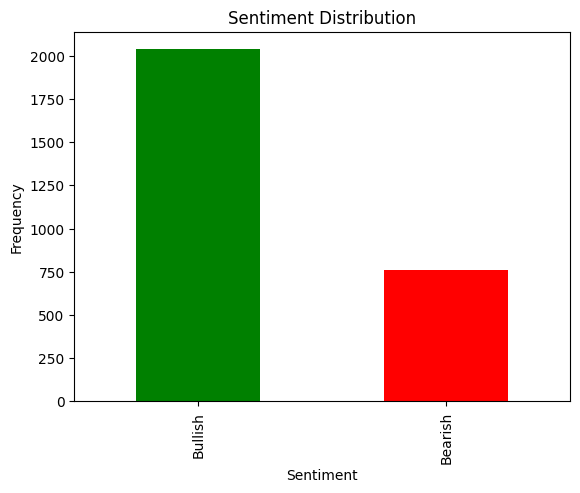

Accuracy: 0.7892857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.38      0.53       173
           1       0.78      0.97      0.86       387

    accuracy                           0.79       560
   macro avg       0.82      0.68      0.70       560
weighted avg       0.80      0.79      0.76       560



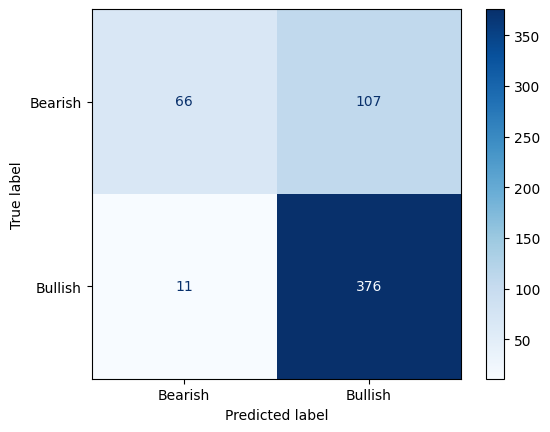

In [14]:
#my imports 
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#setting the path for the vader lexicon
nltk.data.path.append('/kaggle/input/vader-lexicon-txt/')

#loading the lexicon
with open('/kaggle/input/vader-lexicon-txt/vader_lexicon.txt', 'r') as file:
    lexicon = {}
    for line in file:
        word, score = line.split('\t')[:2]
        lexicon[word] = float(score)

#loading the financial news csv dataset
df = pd.read_csv('/kaggle/input/financial-news-headlines/cnbc_headlines.csv')

#data cleaning
df = df.dropna(subset=['Headlines', 'Description'])  # cleaning NaN values
df = df[['Headlines', 'Description']]  # only selecting relevant data
df.reset_index(drop=True, inplace=True)  # resetting index

# sentiment analysis using vader
sia = SentimentIntensityAnalyzer()

# setting location for lexicon
sia.lexicon = lexicon

def classify_sentiment(headline):
    score = sia.polarity_scores(headline)
    return 'Bullish' if score['compound'] >= 0 else 'Bearish'

df['Sentiment'] = df['Headlines'].apply(classify_sentiment)

# visualizing sentiment distribution
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# converting sentiment to label it as 1 for bullish and 0 for bearish
df['Sentiment_Label'] = df['Sentiment'].map({'Bullish': 1, 'Bearish': 0})

# using vectorizer to extract features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Headlines'])

#splitting data to create training sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment_Label'], test_size=0.2, random_state=42)

#random forest classifier training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predicting sentiment for training set
y_pred = model.predict(X_test)

#evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# making confusion matrix
# with labels
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bearish', 'Bullish']) 
disp.plot(cmap=plt.cm.Blues)  
plt.show()
